In [1]:
import numpy as np
import torch
from KMeansPP import get_cos_dis_single_layer
from ClusterMain import pca_dim_deduction
from matplotlib import pyplot as plt

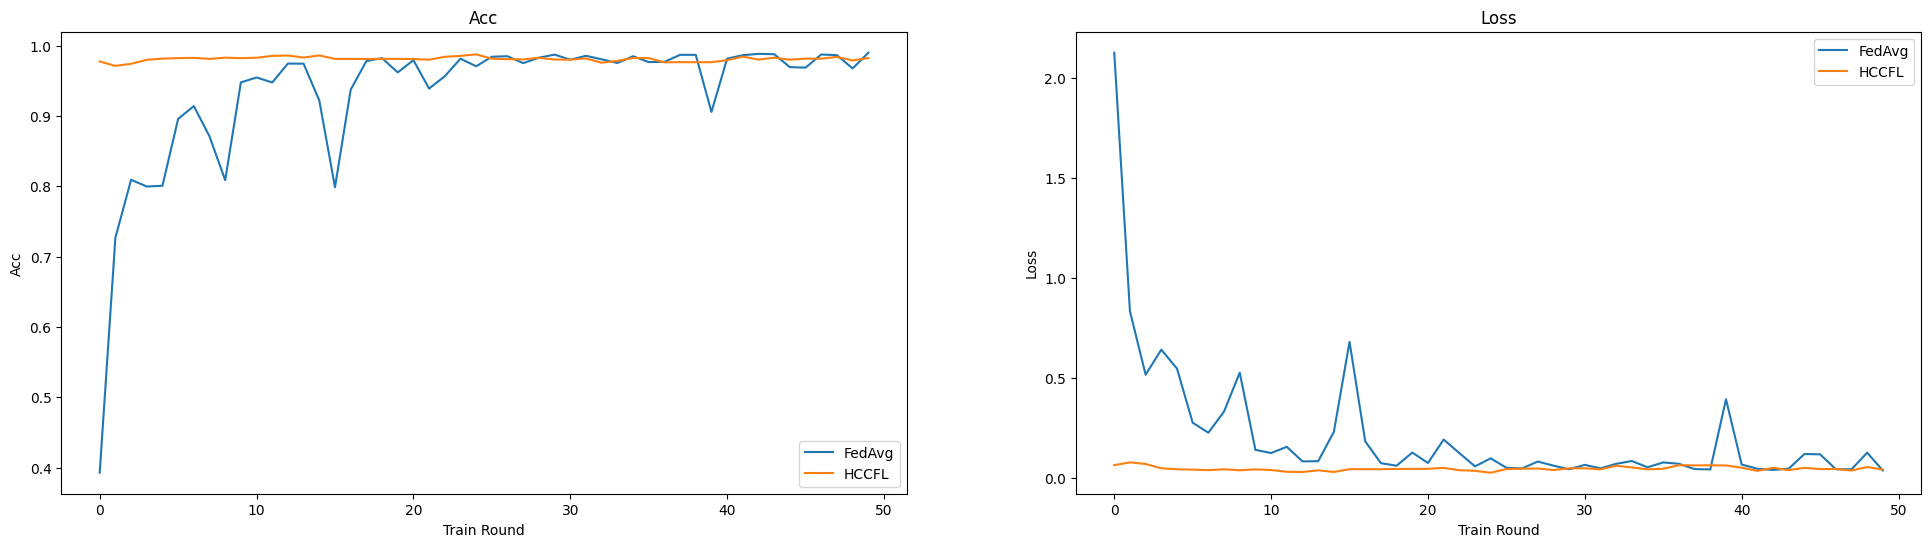

In [2]:
FedAvg_Acc = torch.load('HCFedAvg/HCCFL_FedAvg_Loss_Acc_0_FedAvg_Acc.pt')
FedAvg_Loss = torch.load('HCFedAvg/HCCFL_FedAvg_Loss_Acc_0_FedAvg_Loss.pt')
HC_Acc = torch.load('HCFedAvg/HCCFL_FedAvg_Loss_Acc_0_HCCFL_Acc.pt')
HC_Loss = torch.load('HCFedAvg/HCCFL_FedAvg_Loss_Acc_0_HCCFL_Loss.pt')
fig = plt.figure(figsize=(24, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
len(FedAvg_Acc)

ax1.plot(range(len(FedAvg_Acc)), FedAvg_Acc, label="FedAvg")
ax1.plot(range(len(HC_Acc)), HC_Acc, label="HCCFL")
ax1.legend(loc='best')
ax1.set_xlabel('Train Round')
ax1.set_ylabel('Acc')
ax1.set_title("Acc")

ax2.plot(range(len(FedAvg_Loss)), FedAvg_Loss, label="FedAvg")
ax2.plot(range(len(HC_Loss)), HC_Loss, label="HCCFL")
ax2.legend(loc='best')
ax2.set_xlabel('Train Round')
ax2.set_ylabel('Loss')
ax2.set_title("Loss")

plt.show()


In [32]:
def L2_Distance(tensor1, tensor2):
    # value = torch.pairwise_distance(tensor1, tensor2, p=2).item()
    # dis = round(value, 5)
    # return dis
    #
    rest = torch.cosine_similarity(tensor1, tensor2, dim=-1).item()
    return 1 - rest

tensor([-7.0969e-05, -1.1728e-04, -1.0124e-03, -1.1508e-02, -7.3007e-03,
         4.5646e-07, -2.4142e-02, -3.4318e-03,  7.9787e-05, -4.9363e-02,
        -3.5755e-04, -6.0445e-04, -2.9776e-03,  2.6920e-02, -4.4488e-02,
        -2.7346e-04,  1.0802e-02, -3.3141e-02,  1.4197e-02, -3.9283e-02])
tensor([-7.0969e-05, -1.1728e-04, -1.0124e-03, -1.1508e-02, -7.3007e-03,
         4.5646e-07, -2.4142e-02, -3.4318e-03,  7.9787e-05, -4.9363e-02,
        -3.5755e-04, -6.0445e-04, -2.9776e-03,  2.6920e-02, -4.4488e-02,
        -2.7346e-04,  1.0802e-02, -3.3141e-02,  1.4197e-02, -3.9283e-02])
tensor([-7.0969e-05, -1.1728e-04, -1.0124e-03, -1.1508e-02, -7.3007e-03,
         4.5646e-07, -2.4142e-02, -3.4318e-03,  7.9787e-05, -4.9363e-02,
        -3.5755e-04, -6.0445e-04, -2.9776e-03,  2.6920e-02, -4.4488e-02,
        -2.7346e-04,  1.0802e-02, -3.3141e-02,  1.4197e-02, -3.9283e-02])
tensor([-7.0969e-05, -1.1728e-04, -1.0124e-03, -1.1508e-02, -7.3007e-03,
         4.5646e-07, -2.4142e-02, -3.4318e-03,  

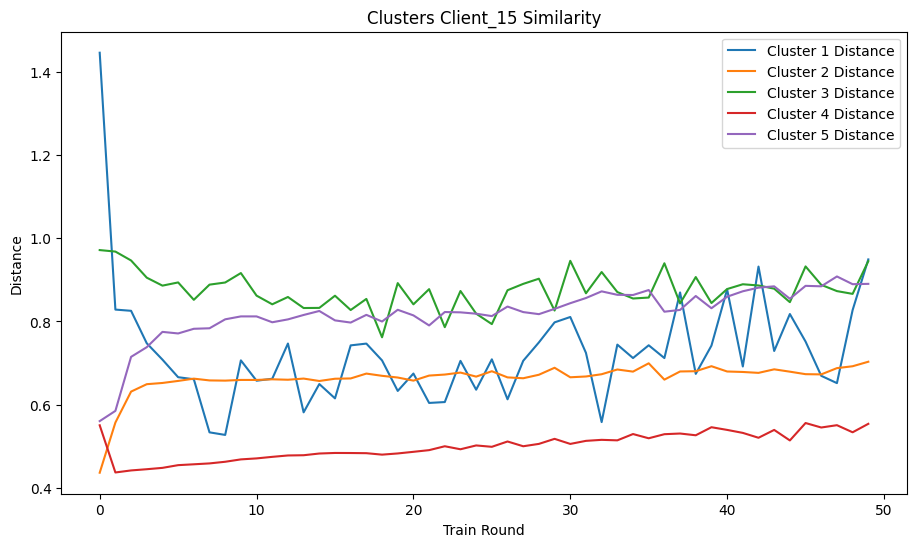

In [81]:



l_client = []
# print(Grad_[0][0])
current_client_id = 15
for round_id in range(len(Grad_[0])):
    l1 = []
    i = 0
    total_l = []
    is_append = True
    for id_1 in Grad_.keys():
        if current_client_id == id_1:
            is_append = False
        print(Grad_[current_client_id][round_id])
        l1.append(L2_Distance(Grad_[current_client_id][round_id], Grad_[id_1][round_id]))
        i += 1
        if i % 5 == 0:
            if is_append is False:
                is_append = True
            else:
                total_l.append(l1[:])
            # total_l.append()
            # l_client.append(l1)
            # print(l1)
            l1 = []
    l_client.append(np.mean(total_l, axis=0))

lines = [[] for i in range(5)]
for i, l in enumerate(l_client):
    for j, value in enumerate(l):
        lines[j].append(value)


# 每一个训练轮次 的 当前客户端与 其他所有客户端的 距离平均值
fig = plt.figure(figsize=(24, 6))
ax1 = fig.add_subplot(1, 2, 1)

for cluster_id, line in enumerate(lines):
    ax1.plot(np.arange(len(line)), line, label="Cluster " + str(cluster_id+1) + " Distance")
# ax1.plot(np.arange(len(global_1_3['acc'])), global_1_3['acc'], label="10-Class Data Distribution")
ax1.legend(loc='best')
ax1.set_xlabel('Train Round')
ax1.set_ylabel('Distance')
ax1.set_title("Clusters Client_{} Similarity".format(current_client_id))
plt.show()

In [17]:
Grad_Random = torch.load('DeepModelSimality/Cluster_Grad_Update_Random_2.pt')
int(15/4)

3

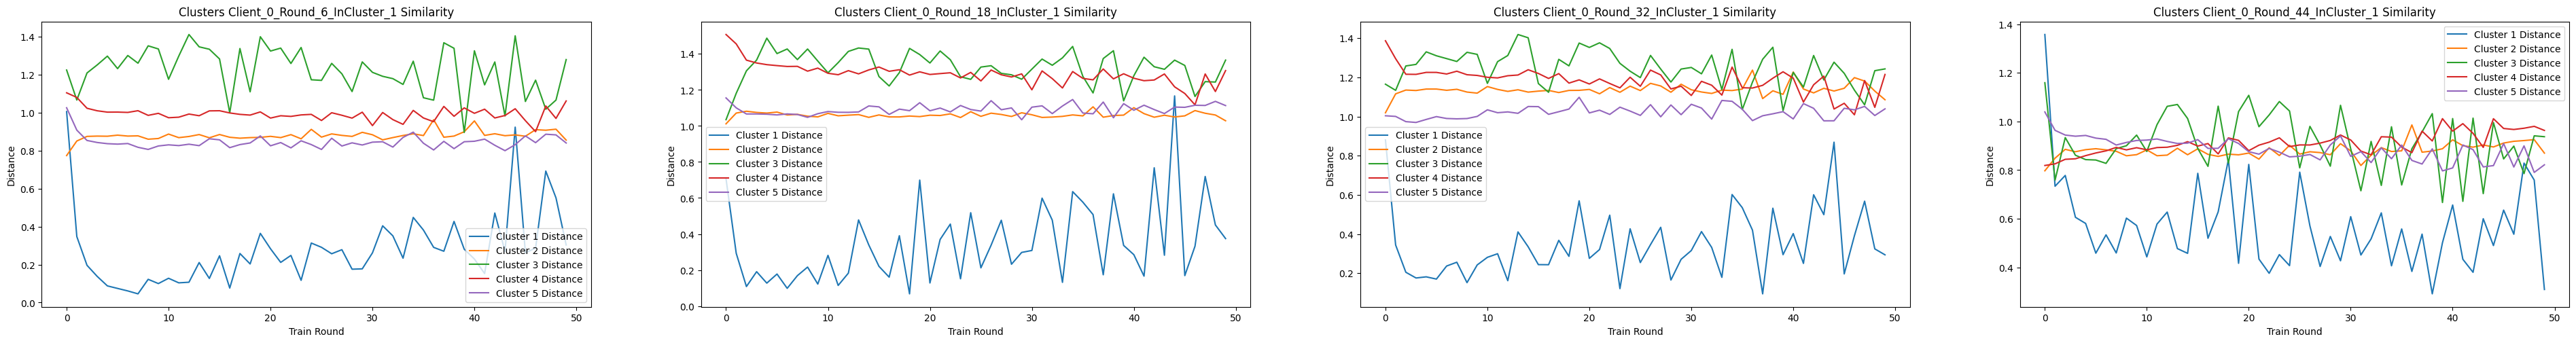

In [33]:
CurrentClientID = 0
CurrentClientRounds = list(Grad_Random[CurrentClientID].keys())

Clusters_Grad = {i : { j : [] for j in range(50)} for i in range(5)} # 每个集群的每个轮次 的梯度列表

fig = plt.figure(figsize=(48, 12))

for Key, Key_Value in Grad_Random.items():
    for key, Value in Key_Value.items():
        if Key is not CurrentClientID:
            Clusters_Grad[Key%5][key].append(Value)
for CurrentRound, CurrentClientRound in enumerate(CurrentClientRounds):
    Lines = [[0 for j in range(50)] for i in range(5)]
    for Key, Key_Value in Clusters_Grad.items():
        for key, Value in Key_Value.items():
            total_dis = 0
            for grad in Value:
                total_dis += L2_Distance(Grad_Random[CurrentClientID][CurrentClientRound], grad)
            Lines[Key][key] = total_dis/len(Value)

    ax1 = fig.add_subplot(int(len(CurrentClientRounds) / 4) + 1, 4, CurrentRound+1)

    for cluster_id, line in enumerate(Lines):
        ax1.plot(np.arange(len(line)), line, label="Cluster " + str(cluster_id+1) + " Distance")
    # ax1.plot(np.arange(len(global_1_3['acc'])), global_1_3['acc'], label="10-Class Data Distribution")
    ax1.legend(loc='best')
    ax1.set_xlabel('Train Round')
    ax1.set_ylabel('Distance')
    ax1.set_title("Clusters Client_{}_Round_{}_InCluster_{} Similarity".format(CurrentClientID, CurrentClientRound, CurrentClientID % 5 +1))
plt.show()